# GCAP3226 Week 3: Regression Analysis In-Class Exercise

## Instructions
This notebook contains exercises for you to complete during class. Follow the prompts and write your code in the designated cells. Make sure to interpret your results and answer any questions provided.

**Dataset**: GCAP3226_week3.csv - Hong Kong Waste Charging Policy Survey Data

**Learning Objectives**:
- Practice linear regression analysis
- Compare forward and backward selection methods
- Interpret regression results
- Create exploratory visualizations
- Understand the relationship between support levels and various factors


## Package Installation and Setup

**Your Task**: Install the required packages and import the necessary libraries.

**Required packages**:
- pandas
- numpy  
- scikit-learn
- statsmodels
- matplotlib

**Instructions**: 
1. Write Python code to install any missing packages using %pip install `library name`
2. Import all necessary libraries for the analysis


In [9]:
# Write Python code for package installation and import
import subprocess
import sys      
print("Checking and installing required packages...")
required_packages = ['numpy', 'pandas', 'scikit-learn', 'statsmodels', 'matplotlib', 'seaborn'] 
for package in required_packages:   
    try:
        __import__(package.replace('-', '_').replace('scikit_learn', 'sklearn'))
        print(f"Package '{package}' is already installed.")
    except ImportError:
        print(f"Package '{package}' not found. Installing...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
        print(f"Package '{package}' installed successfully.")

# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
print("\nAll libraries imported successfully!")

Checking and installing required packages...
Package 'numpy' is already installed.
Package 'pandas' is already installed.
Package 'scikit-learn' not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 48.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 50.4 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Package 'scikit-learn' installed successfully.
Package 'statsmodels' not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 52.2 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Package 'statsmodels' installed successfully.
Package 'matplotlib' is already installed.
Package 'seaborn' is already installed.

All libraries imported successfully!


## Task 1: Data Loading and Initial Exploration

**Your Task**: Load the dataset and perform initial data exploration.

**Instructions**:
1. Load the `GCAP3226_week3.csv` dataset using pandas
2. Display the first few rows to understand the data structure
3. Check the data types and basic information about the dataset
4. Identify the key variables you'll be working with, especially:
   - `support_info` (response variable)
   - `government_consideration` (main predictor)
   - Other potential predictors


In [10]:
# Write Python code to load and explore the dataset
# 1. Load the dataset
df = pd.read_csv('GCAP3226_week3.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

# 2. Display first few rows
print("=" * 60)
print("First 5 rows of the dataset:")
print("=" * 60)
df.head()


Dataset loaded successfully!
Shape: 97 rows, 43 columns

First 5 rows of the dataset:


,ID,support_info,support_after_info,fairness,government_consideration,policy_helpfulness_original,policy_helpfulness,waste_severity,recycling_effort,food_waste_behavior,...,recycle_frequency,household_size,Q1_score,Q2_score,Q3_score,total_score,height,Distance to Nearest Recycling Facility,error,Distance_artificial
0,1,1,1,1,1,1,1,3,1,never_seen,...,1,0,0,1,0,1,1.72,400,-10.263397,259.826667
1,2,5,5,5,5,5,4,2,2,never_seen,...,2,1,0,1,1,2,1.85,300,90.062855,260.040000
2,3,3,5,5,4,2,2,3,1,seen_not_used,...,1,3,0,1,0,1,1.72,400,108.336080,338.893333
3,4,1,2,2,1,2,2,3,2,never_seen,...,2,0,0,1,1,2,1.67,300,-11.113667,192.593333
4,5,1,3,4,3,1,1,3,2,seen_not_used,...,2,2,0,1,1,2,1.84,300,49.418514,232.946667


In [11]:
# 3. Check data info
print("Dataset Information:")
print("=" * 60)
df.info()
print("\n")

# 4. Check basic statistics
print("=" * 60)
print("Basic Statistics:")
print("=" * 60)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         97 non-null     int64  
 1   support_info                               97 non-null     int64  
 2   support_after_info                         97 non-null     int64  
 3   fairness                                   97 non-null     int64  
 4   government_consideration                   97 non-null     int64  
 5   policy_helpfulness_original                97 non-null     int64  
 6   policy_helpfulness                         97 non-null     int64  
 7   waste_severity                             97 non-null     int64  
 8   recycling_effort                           97 non-null     int64  
 9   food_waste_behavior                        97 non-null     object 
 10  LocalRe

,ID,support_info,support_after_info,fairness,government_consideration,policy_helpfulness_original,policy_helpfulness,waste_severity,recycling_effort,LocalResidentcode,...,recycle_frequency,household_size,Q1_score,Q2_score,Q3_score,total_score,height,Distance to Nearest Recycling Facility,error,Distance_artificial
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,2.835052,3.103093,2.948454,2.505155,2.938144,2.422680,2.701031,2.216495,0.680412,...,2.412371,2.226804,0.061856,0.835052,0.556701,1.453608,1.714639,278.350515,2.128432,186.985911
std,28.145456,1.272141,1.103824,1.158044,1.081316,1.337087,0.876012,0.597999,0.710440,0.468739,...,1.196806,1.373144,0.242145,0.373062,0.499355,0.645830,0.083004,71.044006,55.393520,62.703597
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.530000,100.000000,-143.834354,16.440000
25%,25.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.650000,200.000000,-33.038278,140.066667
50%,49.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,...,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.710000,300.000000,1.663419,182.953333
75%,73.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,1.000000,1.000000,2.000000,1.780000,300.000000,35.188596,232.946667
max,97.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,1.000000,...,5.000000,5.000000,1.000000,1.000000,1.000000,3.000000,1.940000,400.000000,130.958539,338.893333


## Task 2: Simple Linear Regression

**Task**: Run a simple linear regression of support level vs government consideration and interpret the results.

**Instructions**:
1. Prepare the data for simple linear regression:
   - Use `support_info` as the dependent variable (y)
   - Use `government_consideration` as the independent variable (x)
   - Handle any missing values appropriately

2. Fit the simple linear regression model using both sklearn and statsmodels

3. Create a scatter plot with the regression line

4. **Interpret the results**:
   - What is the coefficient for government_consideration?
   - Is the relationship statistically significant? (check p-value)
   - What does the R-squared tell us?
   - How would you interpret the coefficient in practical terms?

**Questions to Answer**:
- What is the relationship between government consideration and support level?
- Is this relationship statistically significant?
- How much of the variance in support level is explained by government consideration?


Data prepared: 97 observations after removing missing values

SKLEARN LINEAR REGRESSION RESULTS
Intercept: 0.6460
Coefficient (government_consideration): 0.8738
R-squared: 0.5517

STATSMODELS OLS REGRESSION SUMMARY
                            OLS Regression Results                            
Dep. Variable:           support_info   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           3.09e-18
Time:                        05:24:55   Log-Likelihood:                -121.58
No. Observations:                  97   AIC:                             247.2
Df Residuals:                      95   BIC:                             252.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                     

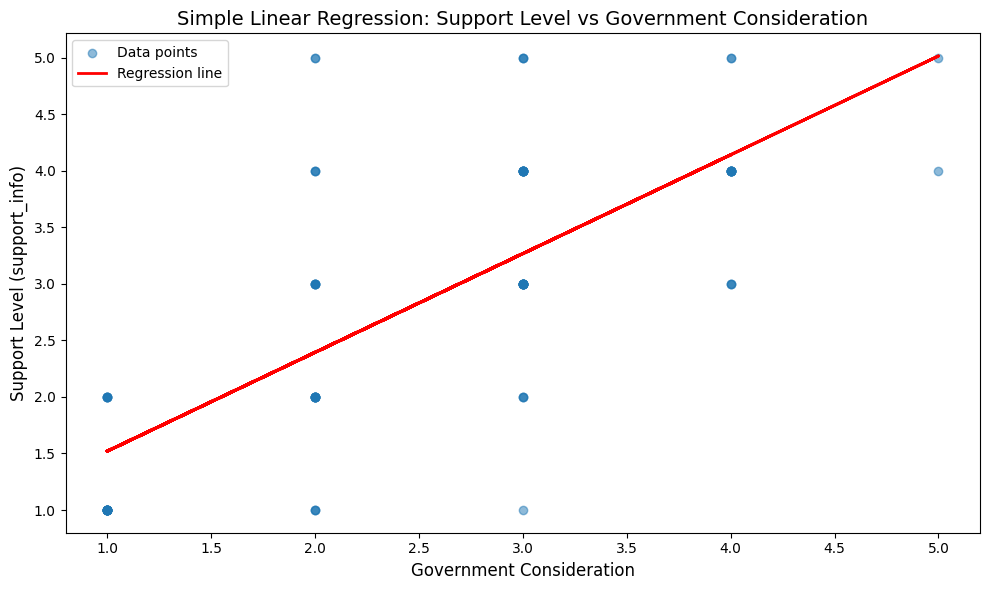


INTERPRETATION
• Coefficient: For each 1-unit increase in government_consideration,
  support_info increases by 0.8738 units.
• R-squared: 55.17% of variance in support level is explained by government consideration.
• P-value: 3.0851e-18 - Statistically significant!


In [12]:
# Task 2: Simple Linear Regression

# 1. Prepare the data - remove missing values
regression_data = df[['support_info', 'government_consideration']].dropna()
X = regression_data[['government_consideration']]
y = regression_data['support_info']
print(f"Data prepared: {len(X)} observations after removing missing values")

# 2. Fit model using sklearn
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)
y_pred = sklearn_model.predict(X)

print("\n" + "=" * 60)
print("SKLEARN LINEAR REGRESSION RESULTS")
print("=" * 60)
print(f"Intercept: {sklearn_model.intercept_:.4f}")
print(f"Coefficient (government_consideration): {sklearn_model.coef_[0]:.4f}")
print(f"R-squared: {r2_score(y, y_pred):.4f}")

# 3. Fit model using statsmodels for statistical tests
X_sm = sm.add_constant(regression_data['government_consideration'])
statsmodel = sm.OLS(y, X_sm).fit()

print("\n" + "=" * 60)
print("STATSMODELS OLS REGRESSION SUMMARY")
print("=" * 60)
print(statsmodel.summary())

# 4. Create visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, alpha=0.5, label='Data points')
ax.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
ax.set_xlabel('Government Consideration', fontsize=12)
ax.set_ylabel('Support Level (support_info)', fontsize=12)
ax.set_title('Simple Linear Regression: Support Level vs Government Consideration', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)
print(f"• Coefficient: For each 1-unit increase in government_consideration,")
print(f"  support_info increases by {sklearn_model.coef_[0]:.4f} units.")
print(f"• R-squared: {r2_score(y, y_pred):.2%} of variance in support level is explained by government consideration.")
print(f"• P-value: {statsmodel.pvalues['government_consideration']:.4e} - ", end="")
print("Statistically significant!" if statsmodel.pvalues['government_consideration'] < 0.05 else "Not statistically significant")

**Your Interpretation Space**: Write your interpretation of the simple linear regression results here.

*Questions to address*:
1. Coefficient interpretation: What does the coefficient mean?
2. Statistical significance: Is the relationship significant?
3. Model fit: How well does the model explain the data?
4. Practical meaning: What does this tell us about the relationship?


## Task 3: Multiple Linear Regression with Variable Selection

**Your Task**: Run multiple linear regression models using **backward** selection methods, then compare the results with the forward selection in the provided notebook.

**Instructions**:
1. **Data Preparation**:
   - Handle missing values appropriately
   - Consider centering continuous variables for better interpretability


2. **Backward Selection**:
   - Start with all predictors
   - Remove variables one at a time based on highest p-value
   - Stop when all remaining variables are significant
   - Record the final model

3. **Comparison**:
   - Compare which variables were selected by each method
   - Compare R-squared and adjusted R-squared values


**Questions to Answer**:
- Do both methods arrive at the same final model?


In [13]:
# Task 3: Data Preparation for Multiple Regression

# Recode household monthly income into a single variable with midpoints
conditions = [
    df['HouseholdMonthlyIncomeRange_Below15k'] == 1,
    df['HouseholdMonthlyIncomeRange_15,001-30,000'] == 1,
    df['HouseholdMonthlyIncomeRange_30,001-50,000'] == 1,
    df['HouseholdMonthlyIncomeRange_50,001-70,000'] == 1,
    df['HouseholdMonthlyIncomeRange_AboveHK70k'] == 1
]
income_values = [10, 22.5, 40, 60, 90]  # midpoints in thousands

df['income'] = np.select(conditions, income_values, default=np.nan)
print("Income variable created with these value counts:")
print(df['income'].value_counts().sort_index())

# Recode education level into a single ordinal variable
conditions = [
    df['HighestEducationLevel_Primaryorbelow'] == 1,
    df['HighestEducationLevel_Secondary'] == 1,
    df['HighestEducationLevel_DiplomaorBachelor'] == 1,
    df['HighestEducationLevel_Masterorabove'] == 1
]
education_values = [1, 2, 3, 4]  # ordinal values for education levels

df['education'] = np.select(conditions, education_values, default=np.nan)
print("\nEducation variable created with these value counts:")
print(df['education'].value_counts().sort_index())

# Recode age from binary columns to a single 'age' column with midpoints
age_columns = ['AgeRange_18-24', 'AgeRange_25-34', 'AgeRange_35-44', 'AgeRange_45-54', 'AgeRange_55-64', 'AgeRange_65+']
midpoints = [20, 30, 40, 50, 60, 70]

# Create 'age' column by finding the midpoint where the binary is 1
df['age'] = np.nan
for col, midpoint in zip(age_columns, midpoints):
    df.loc[df[col] == 1, 'age'] = midpoint

# Handle missing ages
df_clean = df.dropna(subset=['age'])
print(f"\nAge variable created. Remaining observations: {len(df_clean)}")
print(df_clean['age'].value_counts().sort_index())

# Center the continuous variables for better interpretability
df_clean = df_clean.copy()
df_clean['fairness_c'] = df_clean['fairness'] - df_clean['fairness'].mean()
df_clean['government_consideration_c'] = df_clean['government_consideration'] - df_clean['government_consideration'].mean()
df_clean['recycling_effort_c'] = df_clean['recycling_effort'] - df_clean['recycling_effort'].mean()
df_clean['income_c'] = df_clean['income'] - df_clean['income'].mean()
df_clean['education_c'] = df_clean['education'] - df_clean['education'].mean()
df_clean['recycle_frequency_c'] = df_clean['recycle_frequency'] - df_clean['recycle_frequency'].mean()
df_clean['household_size_c'] = df_clean['household_size'] - df_clean['household_size'].mean()
df_clean['total_score_c'] = df_clean['total_score'] - df_clean['total_score'].mean()
df_clean['policy_helpfulness_c'] = df_clean['policy_helpfulness'] - df_clean['policy_helpfulness'].mean()
df_clean['waste_severity_c'] = df_clean['waste_severity'] - df_clean['waste_severity'].mean()
df_clean['age_c'] = df_clean['age'] - df_clean['age'].mean()

print("\nContinuous variables centered successfully!")

Income variable created with these value counts:
income
10.0     7
22.5    19
40.0    28
60.0    24
90.0    19
Name: count, dtype: int64

Education variable created with these value counts:
education
1.0     2
2.0     7
3.0    33
4.0    55
Name: count, dtype: int64

Age variable created. Remaining observations: 97
age
20.0    19
30.0    23
40.0    26
50.0    22
60.0     6
70.0     1
Name: count, dtype: int64

Continuous variables centered successfully!


In [14]:
# Task 3: Multiple Linear Regression with Backward Selection

# Define features for multiple regression
features = ['fairness_c', 'government_consideration_c', 'policy_helpfulness_c', 'waste_severity_c', 'recycling_effort_c',
            'LocalResidentcode', 'DailyWasteBags_More than 1 bag', 'DailyWasteBags_Exactly 1 bag',
            'HousingType_Other', 'HousingType_Private housing', 'HousingType_Subsidized housing',
            'age_c', 'income_c', 'education_c', 'recycle_frequency_c', 'household_size_c', 'total_score_c']

# Prepare data for multiple regression
X_multi = df_clean[features].dropna()
y_multi = df_clean.loc[X_multi.index, 'support_info']

print(f"Multiple regression data: {len(X_multi)} observations, {len(features)} features")
print("=" * 60)

# BACKWARD SELECTION
print("\n" + "=" * 60)
print("BACKWARD SELECTION PROCESS")
print("=" * 60)

current_features = features.copy()
step = 0

while True:
    step += 1
    X_current = sm.add_constant(X_multi[current_features])
    model = sm.OLS(y_multi, X_current).fit()
    
    # Get p-values excluding the constant
    pvalues = model.pvalues.drop('const')
    max_pvalue = pvalues.max()
    
    print(f"\nStep {step}: {len(current_features)} features")
    print(f"  Highest p-value: {max_pvalue:.4f} ({pvalues.idxmax()})")
    
    # Stop if all p-values are significant (< 0.05)
    if max_pvalue < 0.05:
        print(f"  All remaining variables are significant (p < 0.05). Stopping.")
        break
    
    # Remove the variable with highest p-value
    remove_var = pvalues.idxmax()
    current_features.remove(remove_var)
    print(f"  Removed: {remove_var}")

# Final model
print("\n" + "=" * 60)
print("FINAL BACKWARD SELECTION MODEL")
print("=" * 60)
X_final = sm.add_constant(X_multi[current_features])
final_model = sm.OLS(y_multi, X_final).fit()
print(final_model.summary())

print("\n" + "=" * 60)
print("SELECTED VARIABLES (Backward Selection)")
print("=" * 60)
for var in current_features:
    print(f"  • {var}")
print(f"\nR-squared: {final_model.rsquared:.4f}")
print(f"Adjusted R-squared: {final_model.rsquared_adj:.4f}")

Multiple regression data: 97 observations, 17 features

BACKWARD SELECTION PROCESS

Step 1: 17 features
  Highest p-value: 0.8467 (LocalResidentcode)
  Removed: LocalResidentcode

Step 2: 16 features
  Highest p-value: 0.8324 (income_c)
  Removed: income_c

Step 3: 15 features
  Highest p-value: 0.7986 (recycle_frequency_c)
  Removed: recycle_frequency_c

Step 4: 14 features
  Highest p-value: 0.6056 (HousingType_Other)
  Removed: HousingType_Other

Step 5: 13 features
  Highest p-value: 0.4617 (total_score_c)
  Removed: total_score_c

Step 6: 12 features
  Highest p-value: 0.4217 (household_size_c)
  Removed: household_size_c

Step 7: 11 features
  Highest p-value: 0.3340 (recycling_effort_c)
  Removed: recycling_effort_c

Step 8: 10 features
  Highest p-value: 0.3502 (HousingType_Private housing)
  Removed: HousingType_Private housing

Step 9: 9 features
  Highest p-value: 0.3103 (HousingType_Subsidized housing)
  Removed: HousingType_Subsidized housing

Step 10: 8 features
  Highest

**Your Comparison and Analysis**: Write your comparison of forward vs backward selection results here. Are the selected variables the same?


## Task 4: Exploratory Data Analysis and Visualization

**Your Task**: Create visualizations to explore the relationship between support level and potential explanatory variables of your choice.

**Instructions**:
1. **Variable Selection**: Choose 2 additional variables from the dataset that you think might be interesting to explore in relation to support level. Consider variables like:
   - Demographic variables (age, income, education)
   - Attitudinal variables (fairness, policy_helpfulness, waste_severity)
   - Behavioral variables (recycling_effort, recycle_frequency)
   - Other variables that interest you

2. **Create Visualizations**: For each selected variable, create appropriate visualizations:
   - Scatter plots for continuous variables
   - Box plots or bar charts for categorical variables
   - Consider creating grouped visualizations (e.g., support level by different categories)

3. **Analysis and Interpretation**: For each visualization:
   - Describe what you observe
   - Identify any patterns or relationships
   - Discuss potential implications for understanding support levels
   - Consider how these findings relate to your regression results

**Questions to Answer**:
- What patterns do you observe in the data?
- Are there any surprising relationships?
- How do these visual findings support or contradict your regression results?


/tmp/ipykernel_9353/4226999809.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='age_group', y='support_info', ax=ax3, order=age_labels, palette='viridis')
/tmp/ipykernel_9353/4226999809.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='housing_type', y='support_info', ax=ax4, palette='Set2')


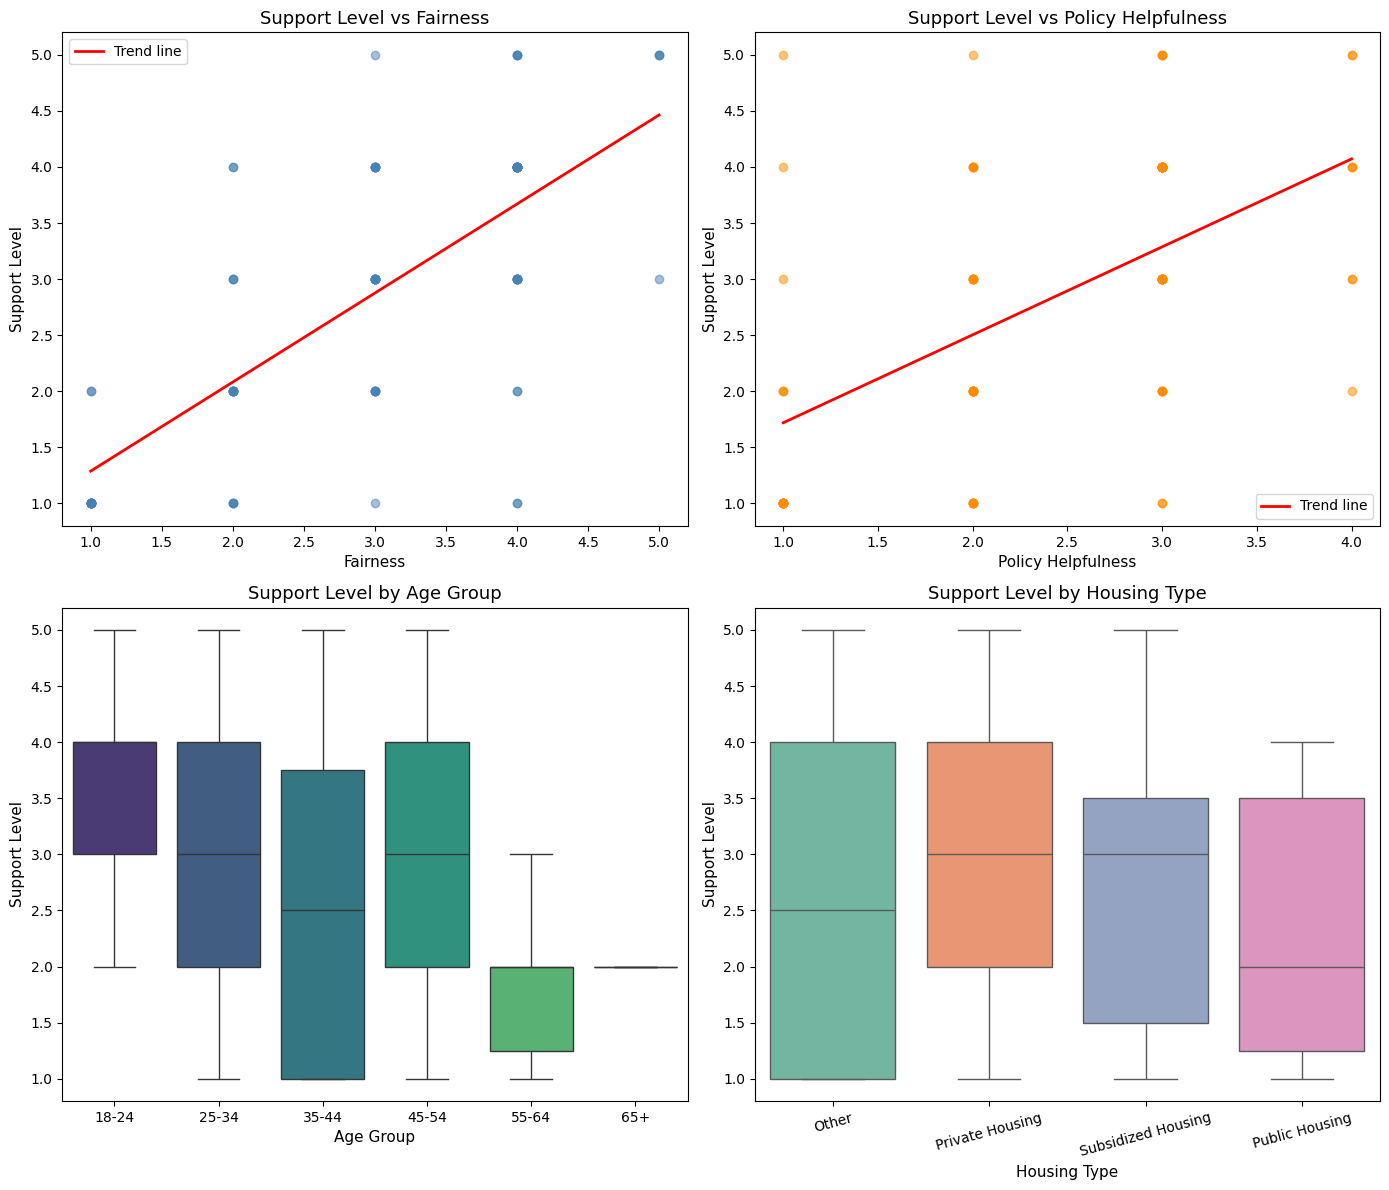


CORRELATION MATRIX FOR KEY VARIABLES


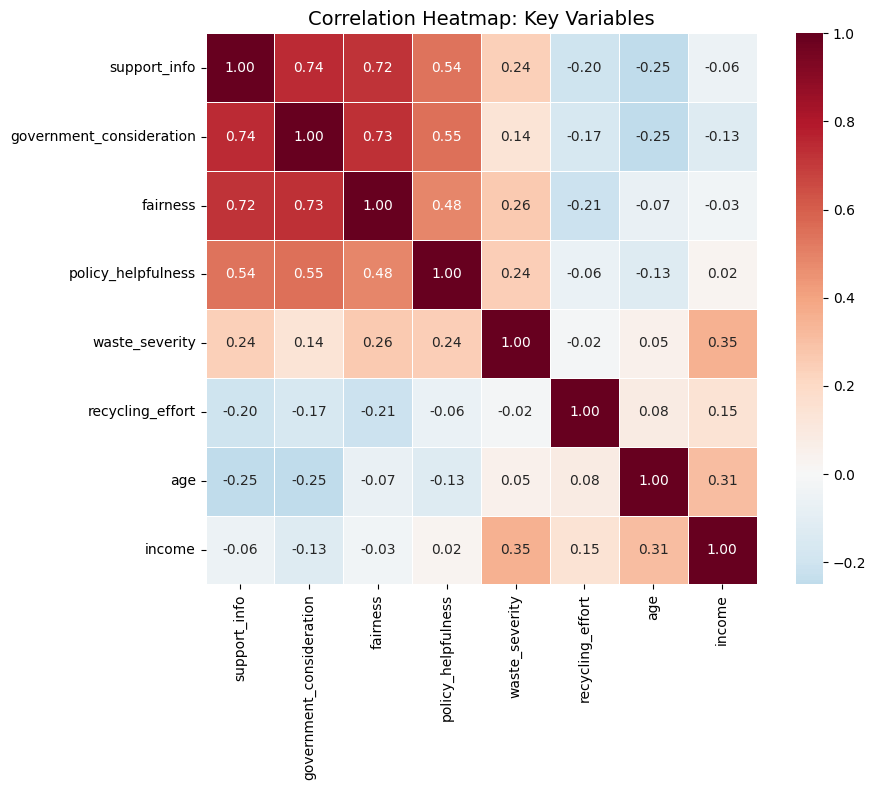


Key Observations:
• Correlation between support_info and government_consideration: 0.743
• Correlation between support_info and fairness: 0.722
• Correlation between support_info and policy_helpfulness: 0.540


In [15]:
# Task 4: Exploratory Data Analysis and Visualization

# Variable 1: Fairness - Scatter plot with support level
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Fairness vs Support Level
ax1 = axes[0, 0]
ax1.scatter(df_clean['fairness'], df_clean['support_info'], alpha=0.5, c='steelblue')
z1 = np.polyfit(df_clean['fairness'].dropna(), df_clean.loc[df_clean['fairness'].notna(), 'support_info'], 1)
p1 = np.poly1d(z1)
x_line = np.linspace(df_clean['fairness'].min(), df_clean['fairness'].max(), 100)
ax1.plot(x_line, p1(x_line), color='red', linewidth=2, label=f'Trend line')
ax1.set_xlabel('Fairness', fontsize=11)
ax1.set_ylabel('Support Level', fontsize=11)
ax1.set_title('Support Level vs Fairness', fontsize=13)
ax1.legend()

# Plot 2: Policy Helpfulness vs Support Level
ax2 = axes[0, 1]
ax2.scatter(df_clean['policy_helpfulness'], df_clean['support_info'], alpha=0.5, c='darkorange')
z2 = np.polyfit(df_clean['policy_helpfulness'].dropna(), df_clean.loc[df_clean['policy_helpfulness'].notna(), 'support_info'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df_clean['policy_helpfulness'].min(), df_clean['policy_helpfulness'].max(), 100)
ax2.plot(x_line2, p2(x_line2), color='red', linewidth=2, label='Trend line')
ax2.set_xlabel('Policy Helpfulness', fontsize=11)
ax2.set_ylabel('Support Level', fontsize=11)
ax2.set_title('Support Level vs Policy Helpfulness', fontsize=13)
ax2.legend()

# Plot 3: Box plot - Support Level by Age Group
ax3 = axes[1, 0]
age_order = [20, 30, 40, 50, 60, 70]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_clean['age_group'] = df_clean['age'].map(dict(zip(age_order, age_labels)))
sns.boxplot(data=df_clean, x='age_group', y='support_info', ax=ax3, order=age_labels, palette='viridis')
ax3.set_xlabel('Age Group', fontsize=11)
ax3.set_ylabel('Support Level', fontsize=11)
ax3.set_title('Support Level by Age Group', fontsize=13)

# Plot 4: Box plot - Support Level by Housing Type
ax4 = axes[1, 1]
# Create housing type variable
df_clean['housing_type'] = 'Public Housing'
df_clean.loc[df_clean['HousingType_Private housing'] == 1, 'housing_type'] = 'Private Housing'
df_clean.loc[df_clean['HousingType_Subsidized housing'] == 1, 'housing_type'] = 'Subsidized Housing'
df_clean.loc[df_clean['HousingType_Other'] == 1, 'housing_type'] = 'Other'
sns.boxplot(data=df_clean, x='housing_type', y='support_info', ax=ax4, palette='Set2')
ax4.set_xlabel('Housing Type', fontsize=11)
ax4.set_ylabel('Support Level', fontsize=11)
ax4.set_title('Support Level by Housing Type', fontsize=13)
ax4.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Correlation heatmap for key variables
print("\n" + "=" * 60)
print("CORRELATION MATRIX FOR KEY VARIABLES")
print("=" * 60)

key_vars = ['support_info', 'government_consideration', 'fairness', 'policy_helpfulness', 
            'waste_severity', 'recycling_effort', 'age', 'income']
corr_matrix = df_clean[key_vars].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', 
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap: Key Variables', fontsize=14)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print(f"• Correlation between support_info and government_consideration: {corr_matrix.loc['support_info', 'government_consideration']:.3f}")
print(f"• Correlation between support_info and fairness: {corr_matrix.loc['support_info', 'fairness']:.3f}")
print(f"• Correlation between support_info and policy_helpfulness: {corr_matrix.loc['support_info', 'policy_helpfulness']:.3f}")

**Your Visualization Analysis**: Write your analysis and interpretation of the visualizations here.


## Summary and Reflection

**Final Questions to Consider**:
- What is your overall assessment of the relationship between government consideration and support for the waste charging policy?
- What would you recommend to policymakers based on your analysis?


---

**End of Exercise**

*Congratulations on completing the regression analysis exercise! You have practiced:*
- *Simple and multiple linear regression*
- *Forward and backward variable selection*
- *Exploratory data analysis and visualization*
- *Statistical interpretation and practical application*

*Remember to save your notebook and review your work before submission.*
